Final project notes:
- make sure to have some documentation like a readme or lots of comments at the top
- be ready to present on Dec 16th
- presentation should explain what the project is, what you have done, issues you encountered, etc

Machine Learning:
- differ from other algorithms we've discussed in that the algorithms are designed to learn something about the data
- the line of what counts isn't clear - technically fitting a line to data is machine learning
- AI is a type of machine learning too but need to be careful with what that means - the machines aren't actually intelligent, but they are doing tasks that we think of as requiring human intelligence
- machine learning types:
    - classification - discrete
    - regression - continuous
    - clustering
    - dimensionality reduction
    - anomaly detection
- machine learning language:
    - features - properties we will use in our learning
    - targets - proerties that we are trying to predict
- two types of tasks:
    - supervised - a set of correct answers are given to train the machine
    - unsupervised - no set of correct answers given
- need to be able to score the model so that it can try to improve that score
    - common method for a binary categorization: confusion matrix with accuracy, precision, recall/sensitivity
        - doesn't work well with unbalanced data sets
        - might care more about one or the other of those metrics depending on the situation - eg, in medicine, false negatives are much worse than false positives
    - lots of options for regression:
        - mean square error
        - median square error
        - mean/median absolute error
        - mean/medium absolute percent error
        - coefficient of determination
- train it on one set of data and test it on another to make sure it's not overfit
    - can do cross-validation to get variance of the model
- bias vs variance:
    - variance is a measure of how different the results are when training the model on different data
    - bias is a measure of how far off repeated measurements are
    - generally there is tradeoff between bias and variance where as the model complexity increases, bias decreases but variance increases
    - so want to find the minimum of the total error - generally where the variance and bias are equal
- learning curve shows how score is affected by number of training example - training score should go down and test score should go up. go until the curve is flattening out. 

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
df=sns.load_dataset('planets')

In [12]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


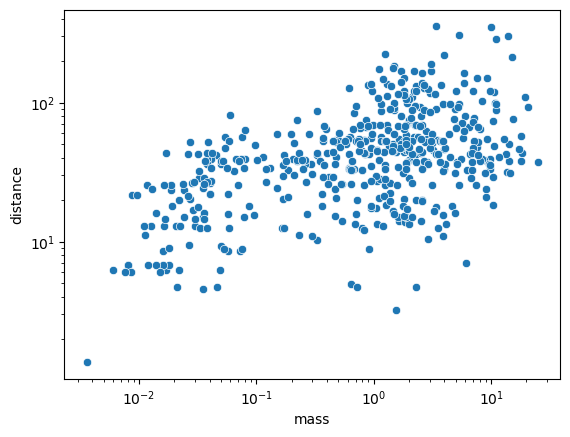

In [20]:
sns.scatterplot(df,x='mass',y='distance')
plt.xscale('log')
plt.yscale('log')

In [70]:
df.dropna(axis=0,inplace=True)

In [72]:
X=np.array([np.log10(df.mass.values)]).T
y=np.log10(df.distance.values)

In [74]:
X.shape

(498, 1)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [78]:
model=linear_model.LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [82]:
y_predict=model.predict(X_test)

In [84]:
model.coef_

array([0.20930207])

In [86]:
mean_squared_error(y_test,y_predict)

0.09185255390192945

In [88]:
r2_score(y_test,y_predict)

0.2881443239624376

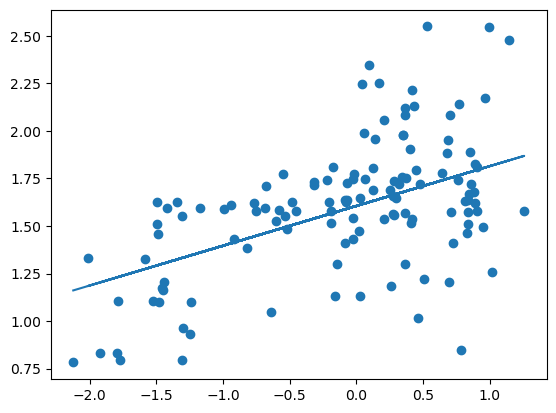

In [90]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict)